# <center> Financial analysis and Trading strategy in Python </center>
## <center> _Tesla Example_ </center>

In [1]:
!pip install pandas_datareader
!pip install yfinance

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

## 1. Import and Analysis of Data

In [3]:
# Import TESLA data from Yahoo Finance API
from pandas_datareader import data as pdr
import yfinance
tsla = pdr.get_data_yahoo('TSLA', start = datetime.datetime(2010, 6, 1), end = datetime.datetime(2020, 9, 1))
tsla.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500.0,4.778
2010-06-30,6.084,4.660,5.158,4.766,85935500.0,4.766
2010-07-01,5.184,4.054,5.000,4.392,41094000.0,4.392


In [4]:
# Inspect the dataset
tsla.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2020-08-19', '2020-08-20', '2020-08-21', '2020-08-24',
               '2020-08-25', '2020-08-26', '2020-08-27', '2020-08-28',
               '2020-08-31', '2020-09-01'],
              dtype='datetime64[ns]', name='Date', length=2563, freq=None)

In [16]:
tsla.describe()

,High,Low,Open,Close,Volume,Adj Close,diff
count,2563.000000,2563.000000,2563.000000,2563.000000,2.563000e+03,2563.000000,2563.000000
mean,47.808407,45.803053,46.809201,46.855214,3.107521e+07,46.855214,-0.046013
std,51.695762,48.606970,50.102209,50.314348,2.900307e+07,50.314348,2.739651
min,3.326000,2.996000,3.228000,3.160000,5.925000e+05,3.160000,-53.710022
25%,7.206000,6.953000,7.058000,7.064000,1.034300e+07,7.064000,-0.389000
50%,44.520000,43.172001,43.976002,43.862000,2.431950e+07,43.862000,0.006000
75%,59.684000,57.390999,58.470001,58.362999,4.006275e+07,58.362999,0.407000
max,502.489990,470.510010,502.140015,498.320007,3.046940e+08,498.320007,33.175995


In [5]:
ts = tsla['Close'][-10:]
print(ts)

Date
2020-08-19    375.705994
2020-08-20    400.365997
2020-08-21    409.996002
2020-08-24    402.839996
2020-08-25    404.667999
2020-08-26    430.634003
2020-08-27    447.750000
2020-08-28    442.679993
2020-08-31    498.320007
2020-09-01    475.049988
Name: Close, dtype: float64


In [7]:
# Observe February 2020
print(tsla.loc[pd.Timestamp('2020-2-1'):pd.Timestamp('2020-2-28')])

                  High         Low        Open       Close       Volume  \
Date                                                                      
2020-02-03  157.227997  134.703995  134.738007  156.000000  236167500.0   
2020-02-04  193.798004  166.776001  176.591995  177.412003  304694000.0   
2020-02-05  169.195999  140.822006  164.651993  146.940002  242119000.0   
2020-02-06  159.166000  137.399994  139.983994  149.792007  199404000.0   
2020-02-07  153.949997  146.000000  146.110001  149.613998   85317500.0   
2020-02-10  163.998001  150.479996  160.000000  154.255997  123446000.0   
2020-02-11  156.701996  151.600006  153.757996  154.876007   58487500.0   
2020-02-12  157.949997  152.673996  155.574005  153.457993   60112500.0   
2020-02-13  163.600006  147.000000  148.367996  160.800003  131446500.0   
2020-02-14  162.593994  157.100006  157.444000  160.005997   78468500.0   
2020-02-18  172.000000  166.472000  168.320007  171.679993   81908500.0   
2020-02-19  188.955994  1

In [8]:
# Observe March 2020
print(tsla.loc[pd.Timestamp('2020-3-1'):pd.Timestamp('2020-3-31')])

                  High         Low        Open       Close       Volume  \
Date                                                                      
2020-03-02  148.738007  137.334000  142.251999  148.723999  100975000.0   
2020-03-03  161.395996  143.222000  161.000000  149.102005  128920000.0   
2020-03-04  153.304001  144.945999  152.792007  149.899994   75245000.0   
2020-03-05  149.149994  143.613998  144.753998  144.908005   54263500.0   
2020-03-06  141.399994  136.854004  138.000000  140.695999   63314500.0   
2020-03-09  132.600006  121.000000  121.078003  121.599998   85368500.0   
2020-03-10  133.600006  121.599998  131.886002  129.065994   77972000.0   
2020-03-11  130.716003  122.599998  128.039993  126.846001   66612500.0   
2020-03-12  118.900002  109.250000  116.178001  112.110001   94545500.0   
2020-03-13  121.514000  100.400002  119.000000  109.323997  113201500.0   
2020-03-16   98.973999   88.433998   93.900002   89.014000  102447500.0   
2020-03-17   94.370003   

In [9]:
# Observe April 2020
print(tsla.loc[pd.Timestamp('2020-4-1'):pd.Timestamp('2020-4-30')])

                  High         Low        Open       Close       Volume  \
Date                                                                      
2020-04-01  102.790001   95.019997  100.800003   96.311996   66766000.0   
2020-04-02   98.851997   89.279999   96.206001   90.893997   99292000.0   
2020-04-03  103.098000   93.678001  101.900002   96.001999  112810500.0   
2020-04-06  104.199997   99.592003  102.239998  103.248001   74509000.0   
2020-04-07  113.000000  106.468002  109.000000  109.089996   89599000.0   
2020-04-08  111.442001  106.666000  110.839996  109.767998   63280000.0   
2020-04-09  115.036003  111.421997  112.417999  114.599998   68250000.0   
2020-04-13  130.399994  116.106003  118.031998  130.190002  112377000.0   
2020-04-14  148.376007  138.485992  139.794006  141.977997  152882500.0   
2020-04-15  150.626007  142.000000  148.399994  145.966003  117885000.0   
2020-04-16  151.889999  141.343994  143.388000  149.042007  103289500.0   
2020-04-17  154.990005  1

In [10]:
# Observe May 2020
print(tsla.loc[pd.Timestamp('2020-5-1'):pd.Timestamp('2020-5-31')])

                  High         Low        Open       Close       Volume  \
Date                                                                      
2020-05-01  154.554001  136.608002  151.000000  140.264008  162659000.0   
2020-05-04  152.399994  139.600006  140.199997  152.238007   96185500.0   
2020-05-05  159.783997  152.436005  157.957993  153.641998   84958500.0   
2020-05-06  157.960007  152.222000  155.300003  156.516006   55616000.0   
2020-05-07  159.279999  154.470001  155.442001  156.007996   57638500.0   
2020-05-08  164.800003  157.401993  158.753998  163.884003   80650500.0   
2020-05-11  164.800003  157.000000  158.102005  162.257996   82598000.0   
2020-05-12  168.658005  161.600006  165.399994  161.882004   79534500.0   
2020-05-13  165.199997  152.660004  164.166000  158.192001   95327500.0   
2020-05-14  160.671997  152.800003  156.000000  160.666000   68411000.0   
2020-05-15  161.009995  157.309998  158.070007  159.834000   52592000.0   
2020-05-18  166.944000  1

In [11]:
# Observe June 2020
print(tsla.loc[pd.Timestamp('2020-6-1'):pd.Timestamp('2020-6-30')])

                  High         Low        Open       Close      Volume  \
Date                                                                     
2020-06-01  179.800003  170.820007  171.600006  179.619995  74697500.0   
2020-06-02  181.731995  174.199997  178.940002  176.311996  67828000.0   
2020-06-03  179.587997  176.020004  177.623993  176.591995  39747500.0   
2020-06-04  179.149994  171.688004  177.975998  172.876007  44438500.0   
2020-06-05  177.304001  173.240005  175.567993  177.132004  39059500.0   
2020-06-08  190.000000  181.832001  183.800003  189.983994  70873500.0   
2020-06-09  190.888000  184.785995  188.001999  188.134003  56941000.0   
2020-06-10  205.496002  196.500000  198.376007  205.009995  92817000.0   
2020-06-11  203.792007  194.399994  198.039993  194.567993  79582500.0   
2020-06-12  197.595993  182.520004  196.000000  187.056000  83817000.0   
2020-06-15  199.768005  181.699997  183.557999  198.179993  78486000.0   
2020-06-16  202.576004  192.477997  20

In [12]:
# Observe July 2020
print(tsla.loc[pd.Timestamp('2020-7-1'):pd.Timestamp('2020-7-31')])

                  High         Low        Open       Close       Volume  \
Date                                                                      
2020-07-01  227.065994  216.100006  216.600006  223.925995   66634500.0   
2020-07-02  245.600006  237.119995  244.296005  241.731995   86250500.0   
2020-07-06  275.558014  253.207993  255.337997  274.316010  102849500.0   
2020-07-07  285.899994  267.342010  281.002014  277.971985  107448500.0   
2020-07-08  283.451996  262.268005  281.000000  273.175995   81556500.0   
2020-07-09  281.712006  270.256012  279.398010  278.855988   58588000.0   
2020-07-10  309.783997  275.201996  279.200012  308.929993  116688000.0   
2020-07-13  358.997986  294.221985  331.799988  299.411987  194927000.0   
2020-07-14  318.000000  286.200012  311.200012  303.359985  117090500.0   
2020-07-15  310.000000  291.399994  308.600006  309.201996   81839000.0   
2020-07-16  306.342010  293.200012  295.432007  300.127991   71504000.0   
2020-07-17  307.502014  2

In [13]:
# Observe August 2020
print(tsla.loc[pd.Timestamp('2020-8-1'):pd.Timestamp('2020-8-31')])

                  High         Low        Open       Close       Volume  \
Date                                                                      
2020-08-03  301.962006  288.876007  289.839996  297.000000   44046500.0   
2020-08-04  305.481995  292.399994  299.002014  297.399994   42075000.0   
2020-08-05  299.967987  293.661987  298.597992  297.003998   24890000.0   
2020-08-06  303.462006  295.451996  298.165985  297.915985   29961500.0   
2020-08-07  299.950012  283.002014  299.907990  290.541992   44482000.0   
2020-08-10  291.500000  277.167999  289.600006  283.713989   37611500.0   
2020-08-11  284.000000  273.000000  279.200012  274.877991   43129000.0   
2020-08-12  317.000000  287.000000  294.000000  310.951996  109494000.0   
2020-08-13  330.235992  313.451996  322.200012  324.200012  102126500.0   
2020-08-14  333.760010  325.328003  332.997986  330.141998   62888000.0   
2020-08-17  369.171997  334.566010  335.399994  367.127991  101211500.0   
2020-08-18  384.779999  3

In [14]:
# Add column Diff between Opening and closing prices
tsla['diff'] = tsla.Open - tsla.Close

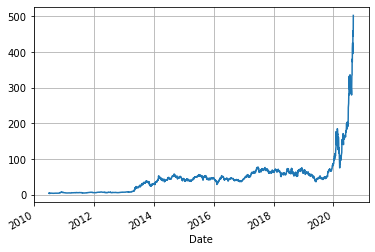

In [18]:
tsla['Open'].plot(grid = True)
plt.show()

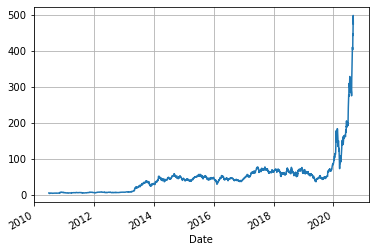

In [15]:
tsla['Close'].plot(grid = True)
plt.show()

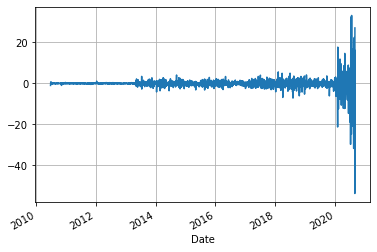

In [17]:
tsla['diff'].plot(grid = True)
plt.show()

In [20]:
tsla.resample('M').mean()

,High,Low,Open,Close,Volume,Adj Close,diff
Date,,,,,,,
2010-06-30,5.542000,4.084000,4.479000,4.772000,8.988350e+07,4.772000,-0.293000
2010-07-31,4.128000,3.763238,4.014667,3.911619,1.537519e+07,3.911619,0.103048
2010-08-31,3.982000,3.816091,3.909091,3.902182,3.417773e+06,3.902182,0.006909
2010-09-30,4.255238,4.061810,4.155809,4.148095,4.296643e+06,4.148095,0.007714
2010-10-31,4.198571,4.085143,4.144667,4.142667,1.559000e+06,4.142667,0.002000
...,...,...,...,...,...,...,...
2020-05-31,163.147200,156.069100,159.812000,159.885102,6.820688e+07,159.885102,-0.073103
2020-06-30,196.173181,187.734000,191.638728,192.708453,5.813016e+07,192.708453,-1.069725
2020-07-31,303.024820,281.311821,292.988002,292.028179,8.607327e+07,292.028179,0.959824


In [25]:
# Compute Financial daily return
daily_close = tsla[['Adj Close']]
daily_return = daily_close.pct_change()
daily_return.fillna(0, inplace = True)
print(daily_return)

            Adj Close
Date                 
2010-06-29   0.000000
2010-06-30  -0.002512
2010-07-01  -0.078472
2010-07-02  -0.125683
2010-07-06  -0.160938
...               ...
2020-08-26   0.064166
2020-08-27   0.039746
2020-08-28  -0.011323
2020-08-31   0.125689
2020-09-01  -0.046697

[2563 rows x 1 columns]


In [27]:
# Compute Financial monthly return
tslad = tsla.resample('M').apply(lambda x: x[-1])
monthly_return = tslad.pct_change()
print(monthly_return)

                High       Low      Open     Close    Volume  Adj Close  \
Date                                                                      
2010-06-30       NaN       NaN       NaN       NaN       NaN        NaN   
2010-07-31 -0.328074 -0.160944 -0.216751 -0.163240 -0.975162  -0.163240   
2010-08-31 -0.031800 -0.011253 -0.026733 -0.023069 -0.528929  -0.023069   
2010-09-30  0.119252  0.044490  0.119023  0.047741  9.918946   0.047741   
2010-10-31 -0.013544  0.042595 -0.039091  0.070064 -0.872211   0.070064   
...              ...       ...       ...       ...       ...        ...   
2020-05-31 -0.040031  0.053320 -0.054304  0.067939 -0.585117   0.067939   
2020-06-30  0.302623  0.248094  0.244513  0.293186  0.432254   0.293186   
2020-07-31  0.394745  0.415699  0.505216  0.325011 -0.276118   0.325011   
2020-08-31  0.648397  0.548614  0.467360  0.741452  0.933117   0.741452   
2020-09-30  0.004699  0.069074  0.129394 -0.046697 -0.238692  -0.046697   

                diff  
D

In [31]:
#Compute Moving averages
adj_price = tsla['Adj Close']
moav = adj_price.rolling(window = 50).mean()
print(moav[-10:])

Date
2020-08-19    270.551117
2020-08-20    274.458237
2020-08-21    278.766797
2020-08-24    283.082477
2020-08-25    287.212237
2020-08-26    291.896397
2020-08-27    296.884237
2020-08-28    301.721997
2020-08-31    307.684797
2020-09-01    313.208517
Name: Adj Close, dtype: float64


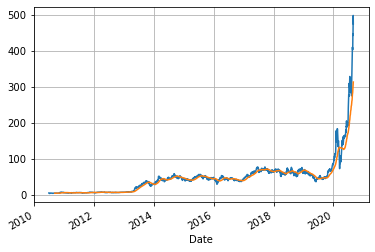

In [33]:
adj_price.plot(grid = True)
moav.plot(grid = True)

## 2. Build a simple trading strategy

In this part, we're going to build a momentum-based Simple Moving Average Crossover (SMAC) strategy.

In [60]:
short_lb = 50
long_lb = 120

In [61]:
signal_df = pd.DataFrame(index = tsla.index)
signal_df['signal'] = 0.0

In [62]:
signal_df['short_moav'] = tsla['Adj Close'].rolling(window = short_lb, min_periods = 1, center = False).mean()

In [63]:
signal_df['long_moav'] = tsla['Adj Close'].rolling(window = long_lb, min_periods = 1, center = False).mean()

In [64]:
signal_df['signal'][short_lb:] = np.where(signal_df['short_moav'][short_lb:] > signal_df['long_moav'][short_lb:], 1.0, 0.0)

In [65]:
signal_df['positions'] = signal_df['signal'].diff()
signal_df[signal_df['positions'] == -1.0]

,signal,short_moav,long_moav,positions
Date,,,,
2011-03-03,0.0,5.02528,5.050667,-1.0
2011-09-06,0.0,5.28852,5.303983,-1.0
2012-06-13,0.0,6.28424,6.309317,-1.0
2013-12-18,0.0,30.11800,30.188917,-1.0
2014-07-17,0.0,42.57232,42.596083,-1.0
2014-12-01,0.0,48.62628,48.727383,-1.0
2015-10-06,0.0,49.93292,49.972934,-1.0
2016-08-04,0.0,43.99448,44.071983,-1.0
2017-11-08,0.0,69.15560,69.193733,-1.0


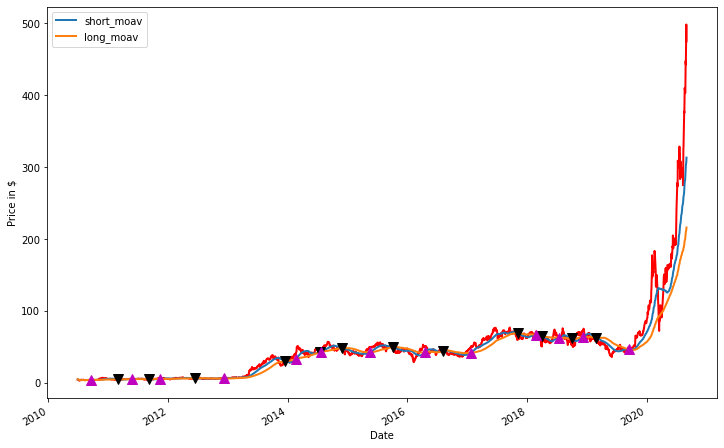

In [66]:
fig = plt.figure()
plt1 = fig.add_subplot(111, ylabel = 'Price in $')
tsla['Adj Close'].plot(ax = plt1, color = 'r', lw = 2.)
signal_df[['short_moav', 'long_moav']].plot(ax=plt1, lw=2., figsize=(12,8))
plt1.plot(signal_df.loc[signal_df.positions == -1.0].index, signal_df.short_moav[signal_df.positions == -1.0],'v', markersize=10, color='k')
plt1.plot(signal_df.loc[signal_df.positions == 1.0].index, signal_df.short_moav[signal_df.positions == 1.0], '^', markersize=10, color='m')
plt.show()